In [153]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [154]:
from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import KFold, StratifiedKFold


In [156]:
# Start the time
t0 = time.time()

cr = pd.read_csv(r'creditcard.csv')
print(cr)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [157]:
cr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [159]:
cr.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [160]:
#check null in dataset
cr.isnull().sum().max()

0

In [161]:
#check column
cr.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [162]:
#check imbalanced of dataset 
print('No Frauds', round(cr['Class'].value_counts()[0]/len(cr) * 100,2), '% of the dataset')
print('Frauds', round(cr['Class'].value_counts()[1]/len(cr) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'The  Distibutions of class\n (0: No Fraud || 1: Fraud)')

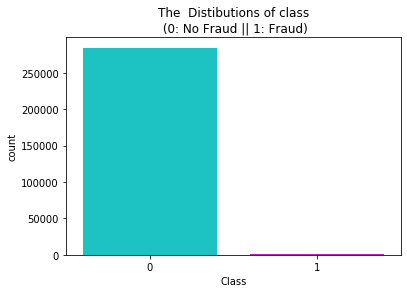

In [163]:
#show imbalanced data
colors = ["#01DFDF", "#DF01DF"]

sns.countplot('Class', data=cr, palette=colors)
plt.title('The  Distibutions of class\n (0: No Fraud || 1: Fraud)', fontsize=12)

In [164]:
#scale and distributing 
# All the coulumns in this data set are already scaled, Except Time and Amount.
# So now
#scale two columns such as amount and time 
from sklearn.preprocessing import StandardScaler, RobustScaler


std_scaler = StandardScaler()
rob_scaler = RobustScaler()

cr['scaled_amount'] = rob_scaler.fit_transform(cr['Amount'].values.reshape(-1,1))
cr['scaled_time'] = rob_scaler.fit_transform(cr['Time'].values.reshape(-1,1))

cr.drop(['Time','Amount'], axis=1, inplace=True)

In [165]:
scaled_amount = cr['scaled_amount']
scaled_time = cr['scaled_time']

cr.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
cr.insert(0, 'scaled_amount', scaled_amount)
cr.insert(1, 'scaled_time', scaled_time)

# Check if they are scalled.
cr.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [166]:
#Random Under sampling
cr = cr.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_cr = cr.loc[cr['Class'] == 1]
non_fraud_cr = cr.loc[cr['Class'] == 0][:492]


normal_distributed_cr = pd.concat([fraud_cr, non_fraud_cr])


# Since we concatinated the fraud and non-fraud. we need shuffle it before resampling.
# Shuffle dataframe rows
new_cr = normal_distributed_cr.sample(frac=1, random_state=42)

new_cr.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
154443,1.089918,0.198087,-1.417853,0.152786,0.023100,-0.877153,2.031634,-2.126592,1.771084,-0.610404,...,0.215293,0.257207,0.602823,-0.455173,0.062963,1.673945,0.455755,-0.187195,0.023628,0
27749,-0.041640,-0.587472,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,...,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,1
175593,2.899322,0.443050,-1.461741,-1.855491,1.107376,-2.469850,-0.056097,-0.438541,0.055212,-0.007640,...,0.484715,0.078040,-0.048803,0.245494,-0.494476,0.799841,-0.037279,-0.075722,0.070080,0
11841,-0.293440,-0.756118,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,...,0.993121,-2.356896,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1
82400,-0.042199,-0.297313,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,...,2.875260,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


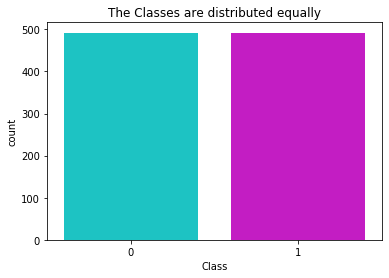

In [167]:
#show equally distributed data 
print('Distribution of the Classes in the subsample dataset')
print(new_cr['Class'].value_counts()/len(new_cr))



sns.countplot('Class', data=new_cr, palette=colors)
plt.title('The Classes are distributed equally', fontsize=12)
plt.show()

#end of data preprocessing

In [168]:
# Undersampling 
X = new_cr.drop('Class', axis=1)
y = new_cr['Class']

In [169]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [171]:
## Designing the base model.
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',  gamma = 'auto')

classifier.fit(X_train,y_train)
# classifier.score(X_test,y_test)

SVC(gamma='auto')

In [172]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [173]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [174]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [175]:
accuracy

0.9137055837563451

In [178]:
## Tuning the model using GridSearchCV
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 20, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 20, 100, 1000], 'kernel': ['rbf'], 
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

In [179]:
# Best training score 
acc = grid_search.best_score_

In [180]:
## training accuracy of SVM using GridSearchCV
acc

0.9466407010710809

In [181]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [182]:
cr=pd.DataFrame(grid_search.cv_results_)
cr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070911,0.050177,0.001098,2.994156e-04,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.974684,0.911392,...,0.911392,0.924051,0.936709,0.949367,0.923077,0.961538,0.923077,0.941529,0.027939,5
1,0.638047,0.544158,0.006483,1.295223e-02,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.974684,0.911392,...,0.949367,0.936709,0.936709,0.949367,0.923077,0.948718,0.923077,0.945310,0.024870,4
2,0.995447,0.421432,0.001796,9.774185e-04,20,linear,NaN,"{'C': 20, 'kernel': 'linear'}",0.974684,0.911392,...,0.949367,0.936709,0.936709,0.949367,0.923077,0.961538,0.923077,0.945326,0.022831,3
3,4.395122,3.405206,0.000998,4.291534e-07,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.974684,0.911392,...,0.936709,0.924051,0.936709,0.962025,0.923077,0.974359,0.923077,0.945342,0.025479,2
4,42.878406,23.381397,0.001297,4.566490e-04,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.949367,0.911392,...,0.936709,0.936709,0.949367,0.949367,0.961538,0.948718,0.935897,0.946641,0.018602,1
5,0.126911,0.025003,0.012566,1.655134e-02,1,rbf,0.1,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.924051,0.835443,...,0.898734,0.949367,0.898734,0.898734,0.884615,0.923077,0.846154,0.900828,0.036451,10
6,0.159623,0.020573,0.010871,1.086570e-02,1,rbf,0.2,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}",0.848101,0.746835,...,0.848101,0.924051,0.822785,0.784810,0.820513,0.820513,0.769231,0.820772,0.046460,15
7,0.145410,0.015098,0.015060,1.763580e-02,1,rbf,0.3,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}",0.835443,0.721519,...,0.835443,0.898734,0.784810,0.759494,0.782051,0.782051,0.743590,0.792795,0.048816,25
8,0.154984,0.029844,0.015758,1.416632e-02,1,rbf,0.4,"{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}",0.822785,0.721519,...,0.835443,0.886076,0.772152,0.734177,0.769231,0.782051,0.730769,0.782636,0.049269,30
9,0.171141,0.038612,0.019747,1.985034e-02,1,rbf,0.5,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",0.822785,0.734177,...,0.860759,0.873418,0.772152,0.772152,0.794872,0.820513,0.730769,0.795375,0.046137,24


In [183]:
cr[['param_C','param_kernel','mean_test_score','std_test_score']]

,param_C,param_kernel,mean_test_score,std_test_score
0,1,linear,0.941529,0.027939
1,10,linear,0.945310,0.024870
2,20,linear,0.945326,0.022831
3,100,linear,0.945342,0.025479
4,1000,linear,0.946641,0.018602
5,1,rbf,0.900828,0.036451
6,1,rbf,0.820772,0.046460
7,1,rbf,0.792795,0.048816
8,1,rbf,0.782636,0.049269
9,1,rbf,0.795375,0.046137


In [184]:
grid_search.best_params_

{'C': 1000, 'kernel': 'linear'}

In [215]:
### now design the model using the suggested parameters.

clas = SVC(kernel = 'linear', C = 1000)

clas.fit(X_train,y_train)

SVC(C=1000, kernel='linear')

In [216]:
# Predicting the Test set results
y_predict = clas.predict(X_test)

In [217]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
SVM_CM = confusion_matrix(y_test, y_predict)
SVM_CM

array([[84,  3],
       [12, 98]], dtype=int64)

In [218]:

from sklearn.metrics import accuracy_score
acc_SVM = accuracy_score(y_test, y_predict)

In [189]:

acc_SVM

0.9238578680203046

In [190]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

In [191]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, 
          "presents training score of", round(training_score.mean(), 2) * 100, "% accuracy")

Classifiers:  KNeighborsClassifier presents training score of 94.0 % accuracy
Classifiers:  SVC presents training score of 94.0 % accuracy
Classifiers:  DecisionTreeClassifier presents training score of 91.0 % accuracy


In [198]:
from sklearn.model_selection import GridSearchCV

knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_



# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,4,1)), 
               
               "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


print(tree_clf)
print(svc)
print(knears_neighbors)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6)
SVC(C=0.9, kernel='linear')
KNeighborsClassifier(n_neighbors=3)


In [201]:
## Decision Tree
DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6)
DT_fit = DT.fit(X_train, y_train)

DT_fit

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=6)

In [202]:
# SVM 

SVM_model = SVC(kernel = 'linear', C = 100)
SVM_model = SVM_model.fit(X_train, y_train)

SVM_model

SVC(C=100, kernel='linear')

In [204]:
# KNN

KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model = KNN_model.fit(X_train, y_train)
KNN_model


KNeighborsClassifier(n_neighbors=3)

In [205]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_knear = KNN_model.predict(X_test)
y_pred_svc = SVM_model.predict(X_test)
y_pred_tree = DT_fit.predict(X_test)


kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)


print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))


print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))


print('Decision Tree')
print(classification_report(y_test, y_pred_tree))

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        87
           1       0.98      0.85      0.91       110

    accuracy                           0.91       197
   macro avg       0.91      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        87
           1       0.96      0.90      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197

Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.98      0.89        87
           1       0.98      0.84      0.90       110

    accuracy                           0.90       197
   macro avg       0.90      0.91      0.90       197
weighted avg   

In [210]:
# accuracy of the models

Accuracy_DT = accuracy_score(y_test, y_pred_tree)
Accuracy_KNN = accuracy_score(y_test, y_pred_knear)
Accuracy_SVM = accuracy_score(y_test, y_pred_svc)

print("Accuracy of Decision Tree model:", Accuracy_DT)
print("Accuracy of KNN model:", Accuracy_KNN)
print("Accuracy of SVM model:", Accuracy_SVM)

Accuracy of Decision Tree model: 0.8984771573604061
Accuracy of KNN model: 0.9086294416243654
Accuracy of SVM model: 0.9238578680203046


In [207]:
#display run time
run_time = time.time() - t0

run_time

1144.0152990818024